# Importing Libraries

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


We first convert the height and weight to SI unit and then calculate the Body-Mass Index

The Body-Mass Index is commonly used to determine the weight range

under 18: Underweight

18 to 25: Normal Weight Range

25 to 30: Overweight

30 to 35: Obese

over 35: Morbidly Obese

However, it is not a perfect tool because it only account for the total weight without looking at its components

In [8]:
# converting to kg
df['Weight'] /= 2.2 
# converting to cm
df['Height'] *= 2.5 
# converting to m
df['Height'] /= 100

h_squared = df['Height'] ** 2
#creating bmi
df['BMI'] = df['Weight'] / h_squared

#rounding the value to 1 decimal
df['Weight'] = round(df['Weight'], 1)
df['Height'] = round(df['Height'], 1)
df['BMI'] = round(df['BMI'], 1)

To have an accurate view of the participant body composition, we will add columns for:

The lean mass (as percent), all the non-fat body tissues

The fat free mass, the weight of the body without its fat

The Fat Free Mass Index or FFMI, the equivalent of BMI for lean mass

In [9]:
df['LeanPercent'] = 100 - df['BodyFat'] # creating the lean body mass column
df['FatFreeMass'] = df['Weight'] * df['LeanPercent'] / 100 # calculating the fat free mass (or lean mass)
df['FFMI'] = df['FatFreeMass'] / h_squared #calculating Fat Free Mass Index

#rouding the value to 1 decimal
df['FatFreeMass'] = round(df['FatFreeMass'], 1)
df['FFMI'] = round(df['FFMI'], 1)

Finally, let's add three boolean columns:

Overweight: people with a BMI over 25

Obese: people with a BMI over 30

HighFat: men with more than 22 percent of body-fat (high-fat level is higher for women)

In [10]:
#initializing the columns
df['Overweight'] = 0
df['Obese'] = 0
df['HighFat'] = 0

hf = 22 #threshold for high fat

#changing the value
df['Overweight'][df['BMI'] >= 25] = 1
df['Obese'][df['BMI'] >= 30] = 1
df['HighFat'][df['BodyFat'] >= hf] =1

In [11]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Biceps,Forearm,Wrist,BMI,LeanPercent,FatFreeMass,FFMI,Overweight,Obese,HighFat
0,1.0708,12.3,23,70.1,1.7,36.2,93.1,85.2,94.5,59.0,...,32.0,27.4,17.1,24.4,87.7,61.5,21.4,0,0,0
1,1.0853,6.1,22,78.8,1.8,38.5,93.6,83.0,98.7,58.7,...,30.5,28.9,18.2,24.1,93.9,74.0,22.7,0,0,0
2,1.0414,25.3,22,70.0,1.7,34.0,95.8,87.9,99.2,59.6,...,28.8,25.2,16.6,25.5,74.7,52.3,19.1,1,0,1
3,1.0751,10.4,26,84.0,1.8,37.4,101.8,86.4,101.2,60.1,...,32.4,29.4,18.2,25.7,89.6,75.3,23.1,1,0,0
4,1.0340,28.7,24,83.8,1.8,34.4,97.3,100.0,101.9,63.2,...,32.2,27.7,17.7,26.4,71.3,59.7,18.8,1,0,1


Finally, let's remove the possible outliers or mistake

It is very unlikely that someone is under 3 percent body-fat, these are called essential fat and are necessary to maintain a functionning body

A BMI over 50 is possible but very unlikely

Finally the natural limit for FFMI is considered to be 25. It is considered that going over is extremely difficult. However some people go over, Mr. Olympia winner Big Ramy has an estimate FFMI of 34.5 and Mr. Olympia Classic Physic Chris Bumstead is estimated at 26.5. Some sumo fighters also are slightly above the threshold

In [12]:
print(df[df['BodyFat'] < 3]) # people with extremly low body-fat (under essential fat threshold)
print(df[df['BMI'] > 50]) #extreme BMI outliers
print(df[df['FFMI'] > 25]) #FFMI natural limit

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
171   1.0983      0.7   35    57.2     1.6  34.0   90.8     75.0  89.2   50.0   
181   1.1089      0.0   40    53.9     1.7  33.8   79.3     69.4  85.0   47.2   

     ...  Biceps  Forearm  Wrist   BMI  LeanPercent  FatFreeMass  FFMI  \
171  ...    24.8     25.9   16.9  21.3         99.3         56.8  21.2   
181  ...    27.7     24.6   16.5  18.6        100.0         53.9  18.7   

     Overweight  Obese  HighFat  
171           0      0        0  
181           0      0        0  

[2 rows x 22 columns]
    Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
38   1.0202     35.2   46   165.1     1.8  51.2  136.2    148.1  147.7   87.3   
41   1.0250     32.9   44    93.2     0.7  36.6  106.0    104.3  115.5   70.6   

    ...  Biceps  Forearm  Wrist    BMI  LeanPercent  FatFreeMass   FFMI  \
38  ...    45.0     29.0   21.4   50.6         64.8        107.0   32.8   
41  ...    33.

We are going to remove four values:

2 with body-fat under 1%

2 with a bmi of 50 and 171 (and FFMI of 32.7 and 115)

In [13]:
df.drop([171, 181], axis=0, inplace=True)
df.drop([38, 41], axis=0, inplace=True)

# Data Visualization

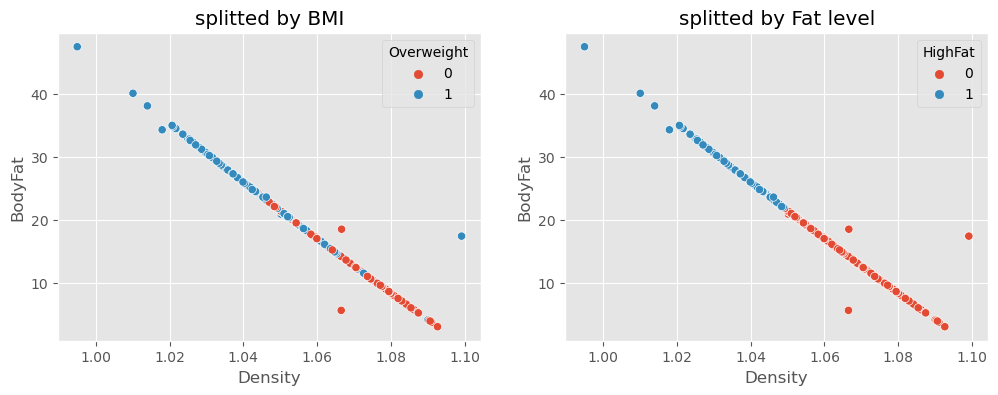

In [14]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=df, x='Density', y='BodyFat', hue='Overweight')
ax[0].set_title('splitted by BMI')

ax[1] = sns.scatterplot(ax=ax[1], data=df, x='Density', y='BodyFat', hue='HighFat')
ax[1].set_title('splitted by Fat level')

plt.show()

Graphing the density versus the bodyfat percent gives us a straight line because here, the bodyfat is calculated using the density.

please note that the BMI based overweight definition (left) include some people with a healthy body-fat level (less than 20)

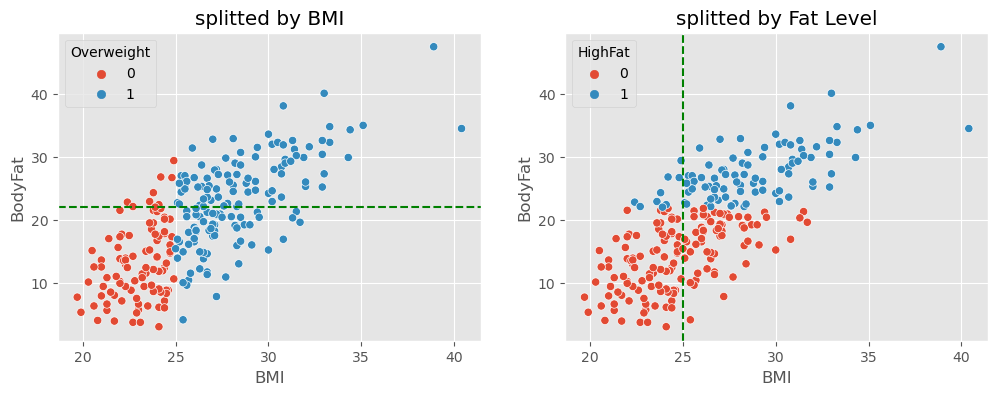

In [15]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=df, x='BMI', y='BodyFat', hue='Overweight')
ax[0].set_title("splitted by BMI")
ax[0].axhline(y=22, linestyle='--', color='green')

sns.scatterplot(ax=ax[1], data=df, x='BMI', y='BodyFat', hue='HighFat')
ax[1].set_title('splitted by Fat Level')
ax[1].axvline(x=25, linestyle='--', color='green')

plt.show()

Here, the difference is much clearer between the bodyfat and weight based analysis.

On the left graph, some people with a healthy body-fat level are consider overweight when using BMI (blue, under the line), while some high fat people are not detected (red, above the line).

On the right graph, some people with a high bmi are still consider as healthy(red, right of the line), and a few people with a BMI under 25 are consider unhealthy, too because of their high fat level (blue, left of the line)

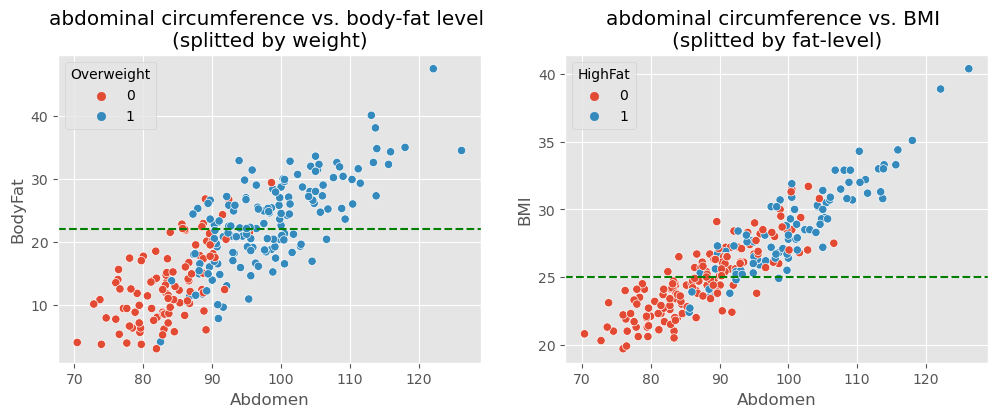

In [16]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))

sns.scatterplot(ax=ax[0], data=df, x='Abdomen', y='BodyFat', hue='Overweight')
ax[0].set_title('abdominal circumference vs. body-fat level \n(splitted by weight)')
ax[0].axhline(y=22, color='green', linestyle='--')

sns.scatterplot(ax=ax[1], data=df, x='Abdomen', y='BMI', hue='HighFat')
ax[1].set_title('abdominal circumference vs. BMI \n(splitted by fat-level)')
ax[1].axhline(y=25, color='green', linestyle='--')

plt.show()

Normal range for abdomen circumference range between 70 to 90 cm for men. (75 to 85 cm using stricter standard)

A larger abdomen is usually a sign of obesity, even when the body looks lean. A large adominal circumference without much subcutaneous fat is a sign of visceral obesity. Visceral obesity is common in men and is a factor of metabolic disorder and hearth problem

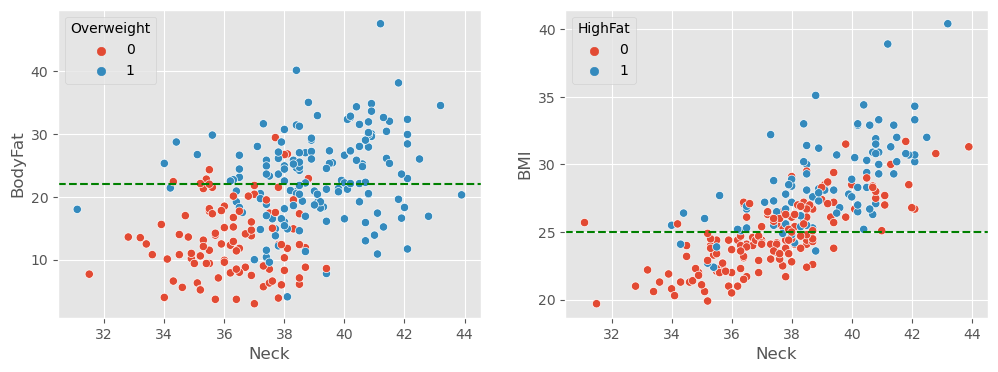

In [17]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))

sns.scatterplot(ax=ax[0], data=df, x='Neck', y='BodyFat', hue='Overweight')
ax[0].set_title("")
ax[0].axhline(22, color='green', linestyle='--')

sns.scatterplot(ax=ax[1], data=df, x='Neck', y='BMI', hue='HighFat')
ax[1].set_title("")
ax[1].axhline(25, color='green', linestyle='--')

plt.show()

necksize is often considered as a good indicator of obesity.

Here, we can see that there is no clear value indicating that a person have bodyfat issues.

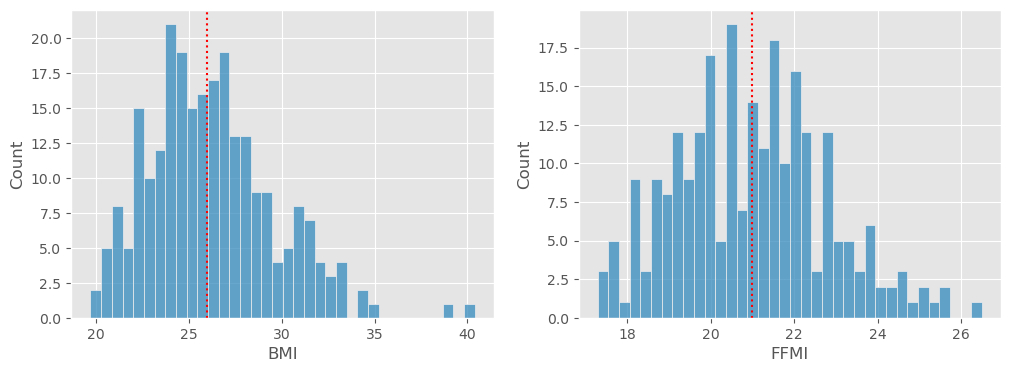

In [18]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 4))

sns.histplot(ax=ax[0], data=df, x='BMI', bins=36)
#ax[0].axvline(df.BMI.mean(), color='red', linestyle='--')
ax[0].axvline(df.BMI.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1], data=df, x='FFMI', bins=36)
#ax[1].axvline(df.FFMI.mean(), color='red', linestyle='--')
ax[1].axvline(df.FFMI.median(), color='red', linestyle=':')

plt.show()

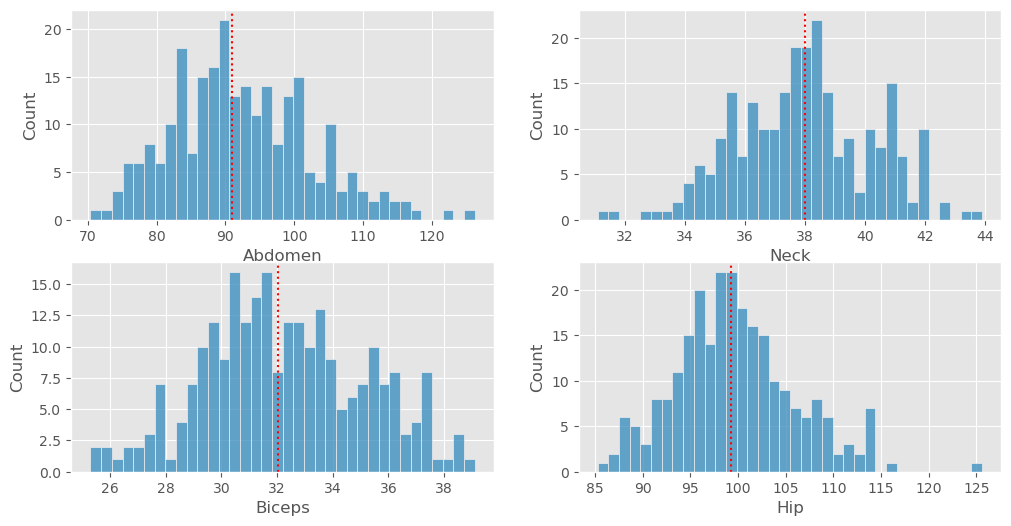

In [19]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))

sns.histplot(ax=ax[0,0], data=df, x='Abdomen', bins=36)
ax[0,0].axvline(x=df.Abdomen.median(), color='red', linestyle=':')

sns.histplot(ax=ax[0,1], data=df, x='Neck', bins=36)
ax[0,1].axvline(x=df.Neck.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,0], data=df, x='Biceps', bins=36)
ax[1,0].axvline(x=df.Biceps.median(), color='red', linestyle=':')

sns.histplot(ax=ax[1,1], data=df, x='Hip', bins=36)
ax[1,1].axvline(x=df.Hip.median(), color='red', linestyle=':')

plt.show()

In [20]:
import plotly.express as px

count = df.Overweight.value_counts()

colors=px.colors.sequential.RdBu
fig = px.pie(count, names=['True', 'False'], values=count.values, color_discrete_sequence=colors)
fig.show()

In [21]:
count = df.Obese.value_counts()

fig = px.pie(count, names=['Not Obese', 'Obese'], values=count.values)
fig.show()

In [22]:
count = df.HighFat.value_counts()

colors=px.colors.sequential.Rainbow
fig = px.pie(count, names=['Normal', 'High Fat'], values=count.values, color_discrete_sequence=colors)
fig.show()

# US Navy body-fat Formula¶
To mesure the body-fat level of its recruits, the US Navy has its own formula based on the height, the abdominal and the neck circumference.

%BF = 495 / ( 1.0324 - 0.19077 log10( waist - neck ) + 0.15456 log10( height ) ) - 450

In [23]:
df['NavyFat'] = 495 / (1.0324 - 0.19077 * np.log10(df['Abdomen'] - df['Neck']) + 0.15456 * np.log10(df['Height'] * 100)) - 450
df['NavyFat'] = round(df['NavyFat'], 1)

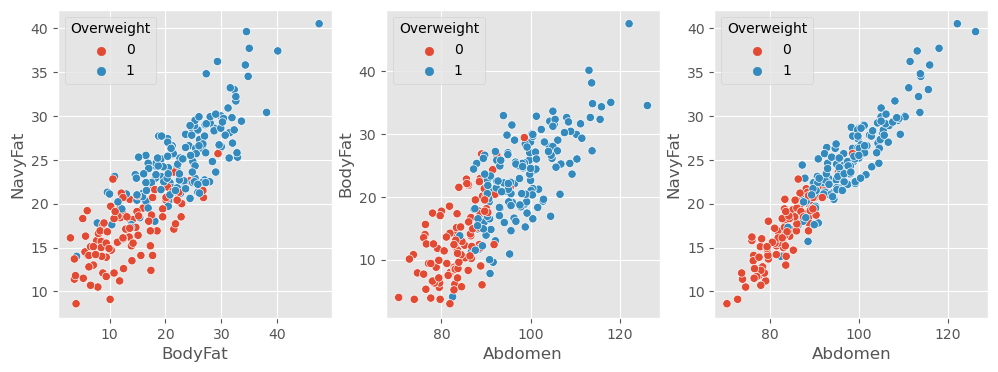

In [24]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=df, x='BodyFat', y='NavyFat', hue='Overweight')

sns.scatterplot(ax=ax[1], data=df, x='Abdomen', y='BodyFat', hue='Overweight')

sns.scatterplot(ax=ax[2], data=df, x='Abdomen', y='NavyFat', hue='Overweight')

plt.show()

We can see that there is more variance in the BodyFat columns compared to the NavyFat

Very few subjects have a NavyFat under 10%. There are also more subjects with body-fat level above 30% using the Navy formula

In [25]:
df[['BodyFat', 'NavyFat', 'Abdomen']][df['BodyFat'] < 10]

,BodyFat,NavyFat,Abdomen
1,6.1,14.1,83.0
8,4.1,14.0,82.5
10,7.1,13.0,83.6
11,7.8,17.8,90.9
25,3.7,13.7,79.7
26,7.9,10.5,74.6
28,3.7,11.4,73.9
29,8.8,17.6,83.5
31,5.7,16.3,84.5
44,7.7,15.8,76.0


# Model Building

In [26]:
X = df[['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']]
y_b = df['BodyFat']
y_n = df['NavyFat']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train_b, y_test_b, y_train_n, y_test_n = train_test_split(X, y_b, y_n,test_size=0.2,random_state=42)

In [29]:
print(X_train.shape, X_test.shape)
print(y_train_b.shape, y_test_b.shape)
print(y_train_n.shape, y_test_n.shape)

(198, 13) (50, 13)
(198,) (50,)
(198,) (50,)


In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
model = LinearRegression()

model.fit(X_train, y_train_b) #training the model for BodyFat column

y_pred_b = model.predict(X_test)
mae_b = mean_absolute_error(y_test_b, y_pred_b)

print(f'the mean absolute error for linear regression trained on BodyFat column is {round(mae_b, 2)}')

model.fit(X_train, y_train_n) #re-training the model for NavyFat column

y_pred_n = model.predict(X_test)
mae_n = mean_absolute_error(y_test_n, y_pred_n)

print(f'the mean absolute error for linear regression trained on NavyFat column is {round(mae_n, 2)}')

the mean absolute error for linear regression trained on BodyFat column is 3.52
the mean absolute error for linear regression trained on NavyFat column is 0.32


In [32]:
final_graph = X_test.copy()
final_graph['BodyFat'] = y_test_b.copy()
final_graph['NavyFat'] = y_test_n.copy()
final_graph['y_pred_b'] = y_pred_b.copy()
final_graph['y_pred_n'] = y_pred_n.copy()

In [33]:
final_graph.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,NavyFat,y_pred_b,y_pred_n
33,41,99.3,1.8,39.8,111.7,100.5,108.3,67.1,44.2,25.2,37.5,31.5,18.7,21.3,25.6,22.988654,25.408958
6,26,82.3,1.7,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,19.2,23.1,16.818956,22.285765
186,41,105.8,1.9,41.9,117.5,109.3,108.8,67.7,41.3,24.7,37.2,31.8,20.0,23.6,27.9,27.457432,28.463754
88,46,80.3,1.8,38.0,97.3,86.0,99.3,61.0,38.4,23.8,30.2,29.3,18.8,8.3,16.9,12.905800,16.853822
158,30,62.0,1.7,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9,12.5,12.6,10.360377,13.488222


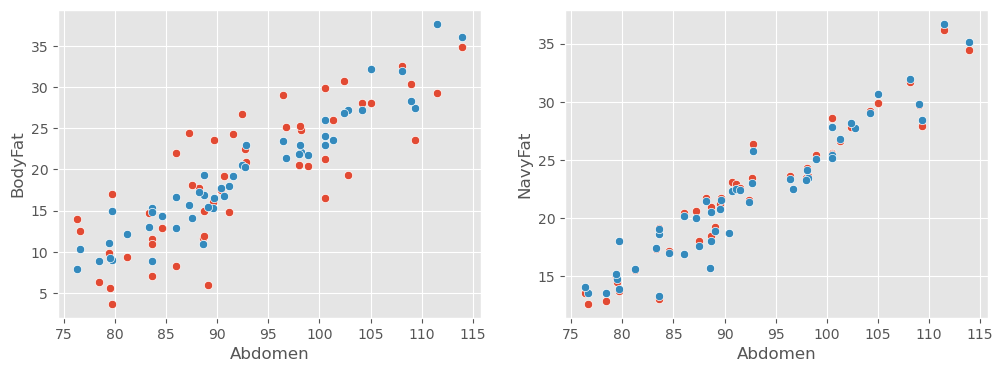

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=final_graph, x='Abdomen', y='BodyFat')
sns.scatterplot(ax=ax[0], data=final_graph, x='Abdomen', y='y_pred_b')

sns.scatterplot(ax=ax[1], data=final_graph, x='Abdomen', y='NavyFat')
sns.scatterplot(ax=ax[1], data=final_graph, x='Abdomen', y='y_pred_n')

plt.show()

<AxesSubplot:xlabel='Biceps', ylabel='NavyFat'>

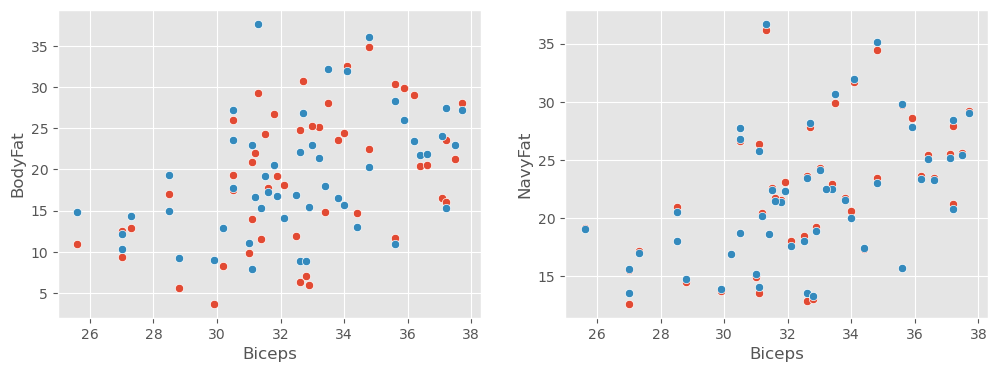

In [35]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=final_graph, x='Biceps', y='BodyFat')
sns.scatterplot(ax=ax[0], data=final_graph, x='Biceps', y='y_pred_b')

sns.scatterplot(ax=ax[1], data=final_graph, x='Biceps', y='NavyFat')
sns.scatterplot(ax=ax[1], data=final_graph, x='Biceps', y='y_pred_n')

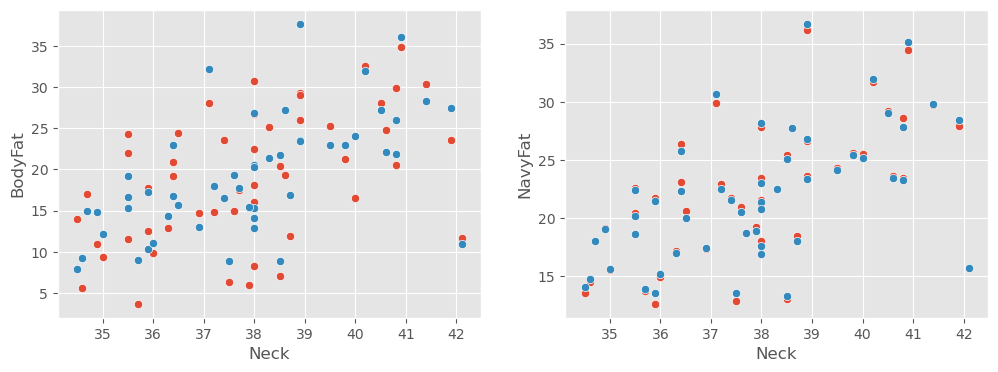

In [36]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=final_graph, x='Neck', y='BodyFat')
sns.scatterplot(ax=ax[0], data=final_graph, x='Neck', y='y_pred_b')

sns.scatterplot(ax=ax[1], data=final_graph, x='Neck', y='NavyFat')
sns.scatterplot(ax=ax[1], data=final_graph, x='Neck', y='y_pred_n')

plt.show()

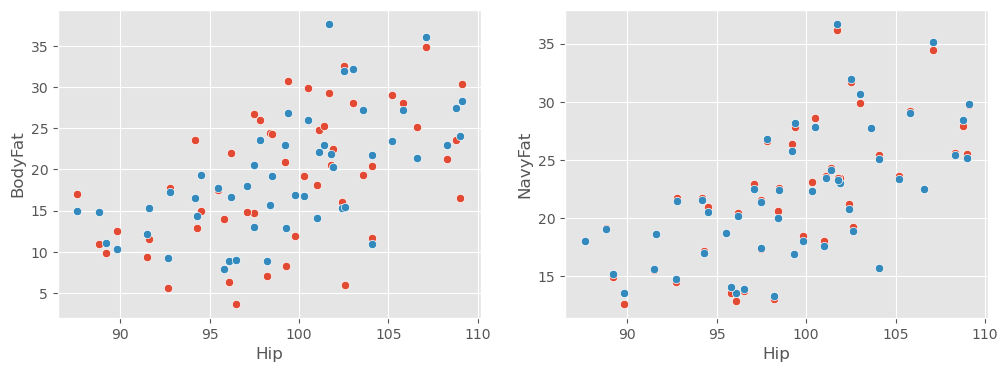

In [37]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=final_graph, x='Hip', y='BodyFat')
sns.scatterplot(ax=ax[0], data=final_graph, x='Hip', y='y_pred_b')

sns.scatterplot(ax=ax[1], data=final_graph, x='Hip', y='NavyFat')
sns.scatterplot(ax=ax[1], data=final_graph, x='Hip', y='y_pred_n')

plt.show()

# Summary
Thank you for reading this notebook, we have seen the differences using BMI and Fat Percent to determine if someone is in a healthy weight range.

Calculating the body-fat percentage using the body density and the abdomen + neck measurements also give us a different value.

Linear regression gives a pretty good estimation of the body-fat percent.

We can see on the last series of graphs that the body-fat percent highly correlate with the abdominal circumference for both method of estimation. It would therefore be easy to use the abdominal circumference to replace BMI as an indicator of health